In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fol
import folium.plugins

from pprint import pprint as pp
from inspect import signature

## PatientInfo.csv 파일 기초탐색

In [2]:
df_patient= pd.read_csv("./DataScienceforCOVID19/PatientInfo.csv")
df_patient.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
pp(df_patient.info())
pp("="* 50)
pp(df_patient.shape)
pp("="* 50)
pp(type(df_patient))
pp("="* 50)
pp(df_patient.columns)
pp("="* 50)
pp(df_patient.index)
pp("="* 50)
pp(df_patient.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB
None
'=================================================='
(5165, 14)
'==

## PatientInfo.csv의 contact_number컬럼 null값 제거
## contact_number int로 형변환

In [4]:
index_null= df_patient.contact_number[df_patient.contact_number== "-"].index
df_patient_nn= df_patient.drop(index_null)
df_patient_nn.shape

(5161, 14)

In [5]:
df_patient_nn["contact_numbers"]= pd.to_numeric(df_patient_nn.contact_number)
del df_patient_nn["contact_number"]
df_patient_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5161 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          5161 non-null   int64  
 1   sex                 4039 non-null   object 
 2   age                 3781 non-null   object 
 3   country             5161 non-null   object 
 4   province            5161 non-null   object 
 5   city                5067 non-null   object 
 6   infection_case      4242 non-null   object 
 7   infected_by         1345 non-null   object 
 8   symptom_onset_date  688 non-null    object 
 9   confirmed_date      5158 non-null   object 
 10  released_date       1583 non-null   object 
 11  deceased_date       66 non-null     object 
 12  state               5161 non-null   object 
 13  contact_numbers     787 non-null    float64
dtypes: float64(1), int64(1), object(12)
memory usage: 604.8+ KB


## 지역별 확진자 히스토그램 생성

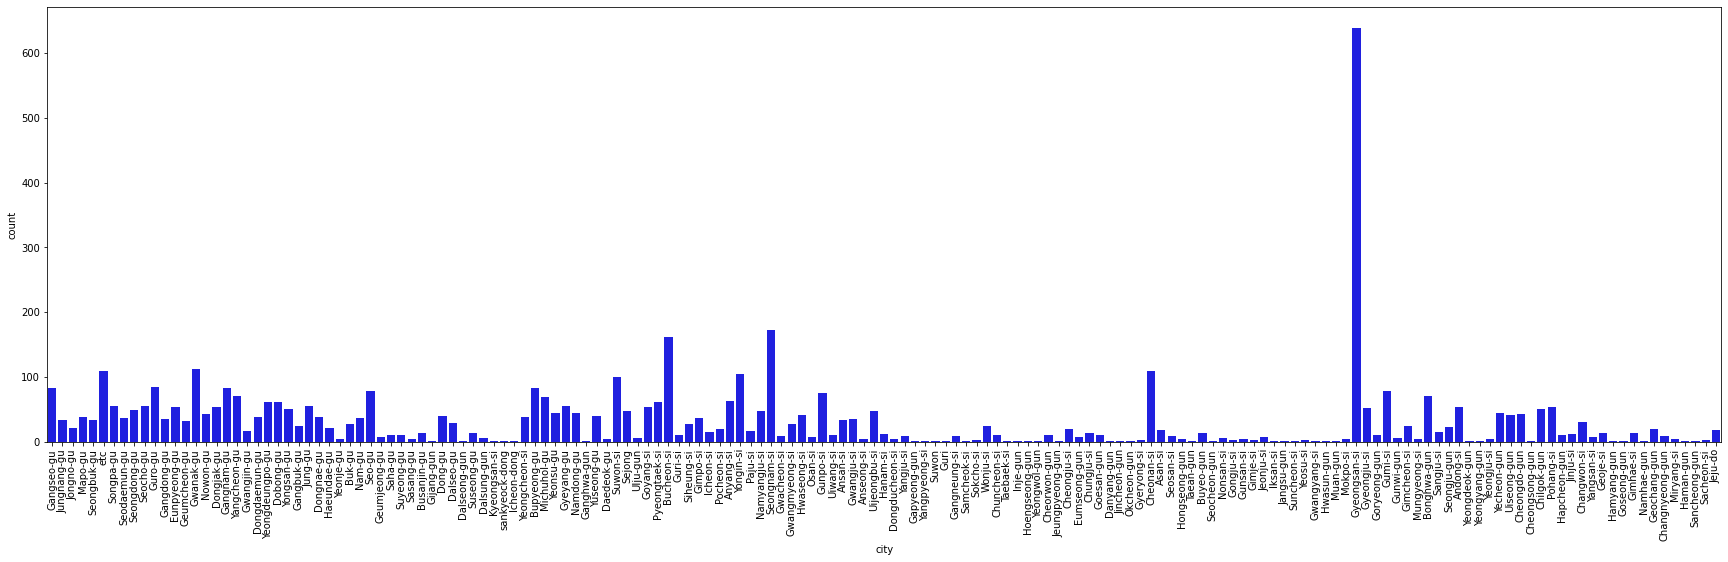

In [6]:
grid1= plt.figure(figsize= (30, 8))
grid1= plt.xticks(rotation= 90)
grid1= sns.countplot("city", data= df_patient_nn, color= "blue")
grid1

## Region.csv 파일 기초탐색

In [7]:
df_region= pd.read_csv("./DataScienceforCOVID19/Region.csv")
df_region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [8]:
pp(df_region.info())
pp("="* 50)
pp(df_region.shape)
pp("="* 50)
pp(type(df_region))
pp("="* 50)
pp(df_region.columns)
pp("="* 50)
pp(df_region.index)
pp("="* 50)
pp(df_region.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB
None
'=================================================='
(244

## df_patient_nn와 df_region 데이터프레임 merge

In [9]:
df_marge= pd.merge(df_patient_nn, df_region, on= "city")
pp(type(df_marge))
df_marge

<class 'pandas.core.frame.DataFrame'>


,patient_id,sex,age,country,province_x,city,infection_case,infected_by,symptom_onset_date,confirmed_date,...,province_y,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,2020-01-22,2020-01-23,...,Seoul,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
1,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,2020-01-22,2020-01-23,...,Busan,35.212424,128.980680,17,21,0,1.43,11.84,5.0,147
2,1000000027,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,NaN,2020-02-23,...,Seoul,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
3,1000000027,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,NaN,2020-02-23,...,Busan,35.212424,128.980680,17,21,0,1.43,11.84,5.0,147
4,1000000106,male,30s,Korea,Seoul,Gangseo-gu,contact with patient,NaN,NaN,2020-03-06,...,Seoul,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,2020-05-30,...,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245
6005,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,2020-06-16,...,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245
6006,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,2020-06-18,...,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245
6007,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,2020-06-18,...,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


## 지역별 확진자 수 테이블 생성

In [10]:
df_group= df_marge.groupby("city").count()
pp(type(df_group))
df_group= {"patient_id": df_group.patient_id}
df_group= pd.DataFrame(df_group)

df_group

<class 'pandas.core.frame.DataFrame'>


,patient_id
city,
Andong-si,53
Ansan-si,33
Anseong-si,4
Anyang-si,63
Asan-si,18
...,...
Yeonsu-gu,45
Yeosu-si,3
Yongin-si,104


## city 위도, 경도 표시 table

In [11]:
df_city= df_marge
df_city= {"city": df_city.city, "latitude": df_city.latitude, "longitude": df_city.longitude}
df_city= pd.DataFrame(df_city)
df_city_nn= df_city.drop_duplicates("city")

df_city_nn

,city,latitude,longitude
0,Gangseo-gu,37.551166,126.849506
166,Jungnang-gu,37.606832,127.092656
199,Jongno-gu,37.572999,126.979189
221,Mapo-gu,37.566283,126.901644
259,Seongbuk-gu,37.589562,127.016700
...,...,...,...
5981,Miryang-si,35.503827,128.746604
5986,Haman-gun,35.272481,128.406540
5987,Sancheong-gun,35.415544,127.873490
5988,Sacheon-si,35.003668,128.064272


## 확진자 수 프레임과 지역데이터 프레임 merge

In [12]:
df_city_nn= pd.merge(df_city_nn, df_group, on= "city")
df_city_nn

,city,latitude,longitude,patient_id
0,Gangseo-gu,37.551166,126.849506,166
1,Jungnang-gu,37.606832,127.092656,33
2,Jongno-gu,37.572999,126.979189,22
3,Mapo-gu,37.566283,126.901644,38
4,Seongbuk-gu,37.589562,127.016700,33
...,...,...,...,...
150,Miryang-si,35.503827,128.746604,5
151,Haman-gun,35.272481,128.406540,1
152,Sancheong-gun,35.415544,127.873490,1
153,Sacheon-si,35.003668,128.064272,3


## 데이터프레임 index(라벨) 초기화

In [13]:
df_city_nn= df_city_nn.reset_index().sort_values("city")
df_city_nn

,index,city,latitude,longitude,patient_id
129,129,Andong-si,36.568441,128.729551,53
72,72,Ansan-si,37.321863,126.830920,33
74,74,Anseong-si,37.008008,127.279763,4
61,61,Anyang-si,37.394258,126.956752,63
100,100,Asan-si,36.789844,127.002420,18
...,...,...,...,...,...
44,44,Yeonsu-gu,37.410262,126.678309,45
114,114,Yeosu-si,34.760421,127.662287,3
62,62,Yongin-si,37.240985,127.178050,104
22,22,Yongsan-gu,37.532768,126.990021,50


In [14]:
df_city_xy= {"latitude": list(df_city_nn.latitude), "longitude": list(df_city_nn.longitude), "patient_id": list(df_city_nn.patient_id)}
df_city_xy= pd.DataFrame(df_city_xy)
df_city_xy

,latitude,longitude,patient_id
0,36.568441,128.729551,53
1,37.321863,126.830920,33
2,37.008008,127.279763,4
3,37.394258,126.956752,63
4,36.789844,127.002420,18
...,...,...,...
150,37.410262,126.678309,45
151,34.760421,127.662287,3
152,37.240985,127.178050,104
153,37.532768,126.990021,50


In [16]:
df_patient = pd.merge(df_patient[['patient_id','province','city']],
                     df_region[['province','city','latitude','longitude']], 
                     how = 'left', 
                     on = ['province','city'])
regional_count = df_patient[['latitude','longitude']].dropna()
regional_count

,latitude,longitude
0,37.551166,126.849506
1,37.606832,127.092656
2,37.572999,126.979189
3,37.566283,126.901644
4,37.589562,127.016700
...,...,...
5160,33.488936,126.500423
5161,33.488936,126.500423
5162,33.488936,126.500423
5163,33.488936,126.500423


In [18]:
count_map= fol.Map(location= [36, 128], zoom_start= 8, tiles='stamenToner')

fol.plugins.HeatMap(
    df_city_xy,
    radius= 30
).add_to(count_map)

# for i in list(df_city_nn.index):
#     fol.Circle(
#         location=[df_city_nn.latitude.iloc[i], df_city_nn.longitude.iloc[i]],
#         radius= 20* int(df_group.patient_id.iloc[i]),
# #         radius= 1000,
#         color= "#000000",
#         fill= True,
#         fill_color= "#000000",
#         popup= df_group.patient_id.iloc[i]
#     ).add_to(count_map)
#     pass    # end of for


fol.plugins.Fullscreen(position='topright').add_to(count_map)

minimap = fol.plugins.MiniMap(toggle_display=True)
count_map.add_child(minimap)


# fol.plugins.MarkerCluster(regional_count).add_to(count_map)

count_map

In [52]:
count_map.save("count_map.html")